EDA

In [1]:
# 📌 STEP 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: style
sns.set(style="whitegrid")

# 📌 STEP 2: Load the dataset
df = pd.read_csv("final_merged3.csv",encoding='ISO-8859-1')

# 📌 STEP 3: Rename columns for easier access
df.rename(columns={'Text': 'text', 'Label': 'label', 'Types': 'type'}, inplace=True)

# 📌 STEP 4: Clean label and type columns (to remove typos, spacing)
df['label_clean'] = df['label'].astype(str).str.strip().str.lower()
df['type_clean'] = df['type'].astype(str).str.strip().str.lower()


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Cyberbullying vs Non-Cyberbullying Counts:
bullying             3449
not-bullying         2252
not-cyberbullying    1125
not- bullying         235
not bullying          217
not_cyberbullying     156
not-bulying            27
not-bulllying          16
not-bulyying           10
not -bullying           3
not - bullying          2
bullying.               1
bullyiing               1
bulying                 1
bullyibg                1
bullyinfg               1
Name: label_clean, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7704\2591203531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label_clean', order=label_counts.index, palette='Set2')


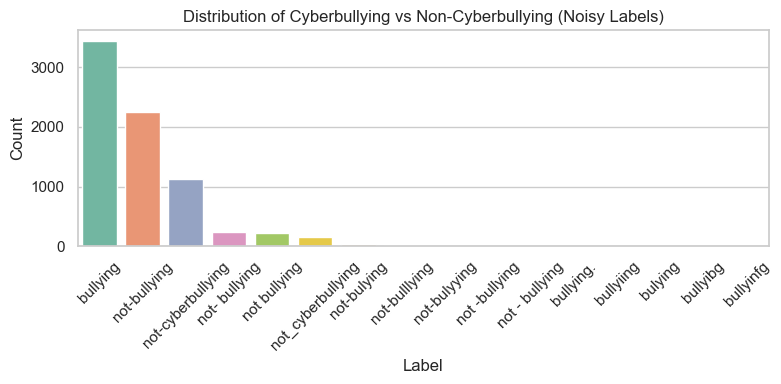

In [2]:
#STEP 5: Count and Plot Cyberbullying vs Non-Cyberbullying
# Count unique values
label_counts = df['label_clean'].value_counts()
print("Cyberbullying vs Non-Cyberbullying Counts:")
print(label_counts)

# Plot
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='label_clean', order=label_counts.index, palette='Set2')
plt.title("Distribution of Cyberbullying vs Non-Cyberbullying (Noisy Labels)")
plt.xticks(rotation=45)
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



Cyberbullying Type Counts:
nan           4040
sexual         728
political      702
troll          671
vocational     489
religion       425
ethnicity      164
threat         150
others          59
threats         40
religon         12
religious       10
other            5
vocation         1
treats           1
Name: type_clean, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7704\2234734453.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='type_clean', order=type_counts.index, palette='viridis')


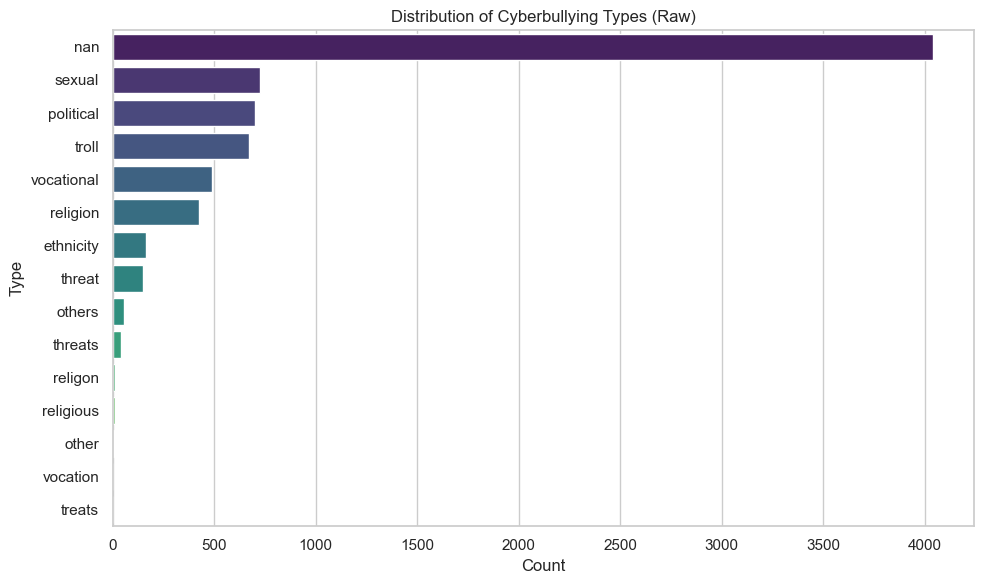

In [3]:
#STEP 6: Count and Plot Cyberbullying Types

# Count of types
type_counts = df['type_clean'].value_counts()
print("\nCyberbullying Type Counts:")
print(type_counts)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='type_clean', order=type_counts.index, palette='viridis')
plt.title("Distribution of Cyberbullying Types (Raw)")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()



Text Length Summary (in words):
count    7497.000000
mean        8.888089
std         4.416894
min         1.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        52.000000
Name: text_length, dtype: float64


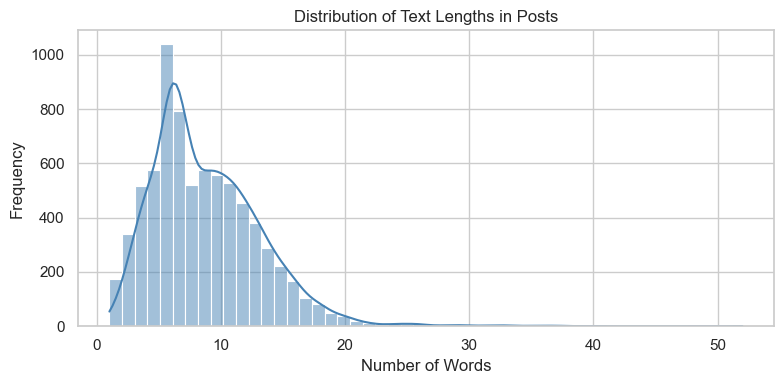

In [4]:
#STEP 7: Text Length Distribution
# Add new column for text length
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

# Summary statistics
print("\nText Length Summary (in words):")
print(df['text_length'].describe())

# Plot histogram of text lengths
plt.figure(figsize=(8, 4))
sns.histplot(df['text_length'], bins=50, kde=True, color='steelblue')
plt.title("Distribution of Text Lengths in Posts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


 Cell 11: Define Clean Functions for Label and Type

In [5]:
# Clean binary label (cyberbullying = 1, non-cyberbullying = 0)
def clean_label(val):
    val = str(val).strip().lower()
    if "bully" in val and "not" not in val:
        return 1
    elif "not" in val or "non" in val:
        return 0
    else:
        return None  # catch-all for invalid/missing

# Clean bullying types into categories
def clean_type(val):
    val = str(val).strip().lower()
    mapping = {
        'sexual': 'sexual',
        'sex': 'sexual',
        'saxual': 'sexual',
        'religion': 'religious',
        'religeon': 'religious',
        'religious': 'religious',
        'relgion': 'religious',
        'ethnicity': 'ethnicity',
        'ethnically': 'ethnicity',
        'racism': 'ethnicity',
        'political': 'political',
        'vocation': 'general',
        'vocational': 'general',
        'threat': 'general',
        'threats': 'general',
        'troll': 'general',
        'others':'general'
    }
    # Match using keyword mapping
    for key in mapping:
        if key in val:
            return mapping[key]
    return 'other'


Cell 12: Apply the Cleaning

In [6]:
# Apply cleaning functions
df['label_final'] = df['label'].apply(clean_label)
df['type_final'] = df['type'].apply(clean_type)

# Drop rows with unknown or invalid labels (if any)
df = df[df['label_final'].isin([0, 1])]


 Cell 13: Check Final Counts After Cleaning



In [7]:
# Final label distribution
print("Cleaned Label Counts:")
print(df['label_final'].value_counts())

# Final type distribution
print("\nCleaned Type Counts:")
print(df['type_final'].value_counts())


Cleaned Label Counts:
0.0    4043
1.0    3453
Name: label_final, dtype: int64

Cleaned Type Counts:
other        4058
general      1410
sexual        727
political     702
religious     435
ethnicity     164
Name: type_final, dtype: int64


Cell 14: Plot Cleaned Results



C:\Users\HP\AppData\Local\Temp\ipykernel_7704\423896938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_final', data=df, palette='Set1')


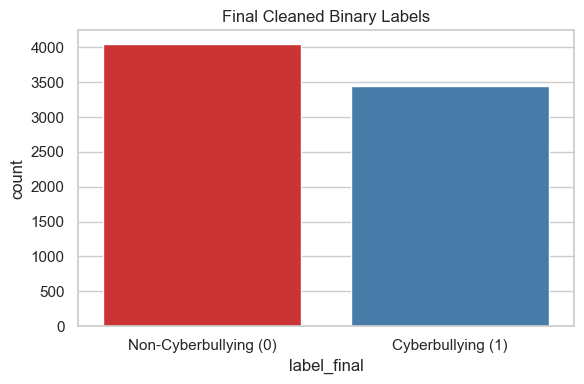

C:\Users\HP\AppData\Local\Temp\ipykernel_7704\423896938.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type_final', data=df, order=df['type_final'].value_counts().index, palette='coolwarm')


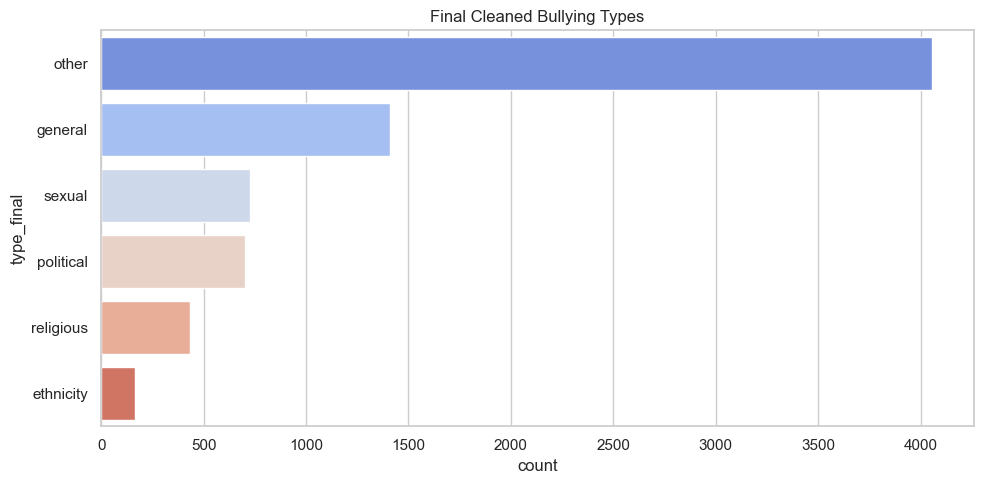

In [8]:
# Plot cleaned labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label_final', data=df, palette='Set1')
plt.title("Final Cleaned Binary Labels")
plt.xticks([0, 1], ['Non-Cyberbullying (0)', 'Cyberbullying (1)'])
plt.tight_layout()
plt.show()

# Plot cleaned types
plt.figure(figsize=(10, 5))
sns.countplot(y='type_final', data=df, order=df['type_final'].value_counts().index, palette='coolwarm')
plt.title("Final Cleaned Bullying Types")
plt.tight_layout()
plt.show()


Feature Extraction

Cell 1: Import Required Libraries



In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import re


Cell 2: Clean Text for Vectorization

In [10]:
# Simple text cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)


Cell 3: CountVectorizer for ML Models

In [11]:
# Vectorize using Bag of Words
vectorizer = CountVectorizer(max_features=5000)
X_count = vectorizer.fit_transform(df['clean_text'])

# Target for binary classification
y_binary = df['label_final']


Cell 4: Train-Test Split (for ML Models

In [12]:
X_train_count, X_test_count, y_train_binary, y_test_binary = train_test_split(
    X_count, y_binary, test_size=0.2, random_state=42)


Cell 5: Multiclass Target for Type Detection

In [13]:
# Use only cyberbullying rows (label=1) for type classification
df_type = df[df['label_final'] == 1].copy()

# Text and labels for type detection
X_type = df_type['clean_text']
y_type = df_type['type_final']

# Vectorize
X_type_vec = vectorizer.fit_transform(X_type)

# Train-test split for type detection
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(
    X_type_vec, y_type, test_size=0.2, random_state=42)


In [14]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Cell 2: Model Training
Binary Classification (Assumes X_train_count, y_train_binary exist)

In [15]:
# Binary Models
log_bin = LogisticRegression(max_iter=200)
rf_bin = RandomForestClassifier(n_estimators=100, random_state=42)
ada_bin = AdaBoostClassifier(n_estimators=100)

log_bin.fit(X_train_count, y_train_binary)
rf_bin.fit(X_train_count, y_train_binary)
ada_bin.fit(X_train_count, y_train_binary)


AdaBoostClassifier(n_estimators=100)

Type Classification (Assumes X_train_type, y_train_type exist)



In [16]:
# Multi-class Models
log_type = LogisticRegression(max_iter=200)
rf_type = RandomForestClassifier(n_estimators=100, random_state=42)
ada_type = AdaBoostClassifier(n_estimators=100)

log_type.fit(X_train_type, y_train_type)
rf_type.fit(X_train_type, y_train_type)
ada_type.fit(X_train_type, y_train_type)


AdaBoostClassifier(n_estimators=100)

Cell 3:  Evaluation Function (for Binary & Type

In [17]:
def evaluate_model(model, X_test, y_test, model_name, task_type='binary'):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print metrics
    print(f"📊 {model_name} ({task_type.upper()})")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(pd.DataFrame(report).transpose())

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - {task_type.capitalize()} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    
    return {
        'Model': model_name,
        'Type': task_type,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }


Cell 4: Evaluate All Models

📊 Logistic Regression (BINARY)
Accuracy: 0.8986666666666666
              precision    recall  f1-score      support
0.0            0.908189  0.903704  0.905941   810.000000
1.0            0.887608  0.892754  0.890173   690.000000
accuracy       0.898667  0.898667  0.898667     0.898667
macro avg      0.897898  0.898229  0.898057  1500.000000
weighted avg   0.898722  0.898667  0.898688  1500.000000


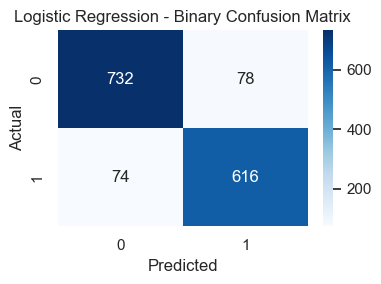

📊 Random Forest (BINARY)
Accuracy: 0.892
              precision    recall  f1-score   support
0.0            0.878505  0.928395  0.902761   810.000
1.0            0.909938  0.849275  0.878561   690.000
accuracy       0.892000  0.892000  0.892000     0.892
macro avg      0.894221  0.888835  0.890661  1500.000
weighted avg   0.892964  0.892000  0.891629  1500.000


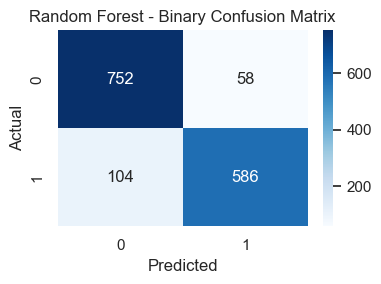

📊 AdaBoost (BINARY)
Accuracy: 0.828
              precision    recall  f1-score   support
0.0            0.866048  0.806173  0.835038   810.000
1.0            0.789544  0.853623  0.820334   690.000
accuracy       0.828000  0.828000  0.828000     0.828
macro avg      0.827796  0.829898  0.827686  1500.000
weighted avg   0.830856  0.828000  0.828274  1500.000


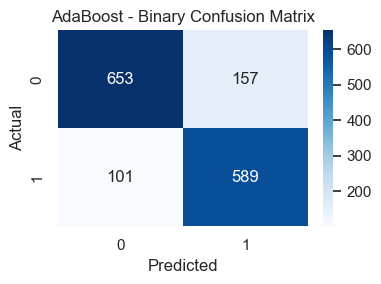

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

📊 Logistic Regression (TYPE)
Accuracy: 0.8162083936324168
              precision    recall  f1-score     support
ethnicity      0.576923  0.384615  0.461538   39.000000
general        0.798834  0.907285  0.849612  302.000000
other          0.000000  0.000000  0.000000    3.000000
political      0.953125  0.859155  0.903704  142.000000
religious      0.869565  0.779221  0.821918   77.000000
sexual         0.744000  0.726562  0.735178  128.000000
accuracy       0.816208  0.816208  0.816208    0.816208
macro avg      0.657075  0.609473  0.628658  691.000000
weighted avg   0.812272  0.816208  0.810853  691.000000


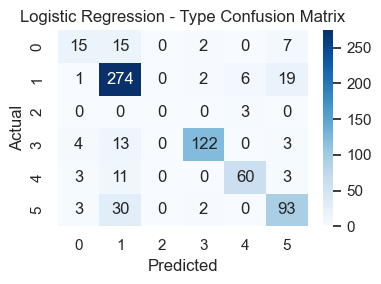

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

📊 Random Forest (TYPE)
Accuracy: 0.7916063675832128
              precision    recall  f1-score     support
ethnicity      0.533333  0.205128  0.296296   39.000000
general        0.756684  0.937086  0.837278  302.000000
other          0.000000  0.000000  0.000000    3.000000
political      0.920635  0.816901  0.865672  142.000000
religious      0.876923  0.740260  0.802817   77.000000
sexual         0.747748  0.648438  0.694561  128.000000
accuracy       0.791606  0.791606  0.791606    0.791606
macro avg      0.639221  0.557969  0.582771  691.000000
weighted avg   0.786228  0.791606  0.778668  691.000000


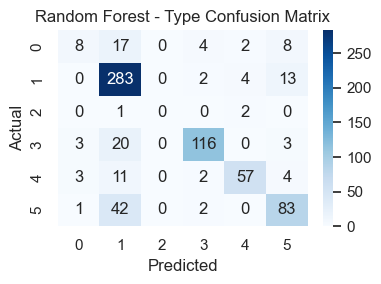

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

📊 AdaBoost (TYPE)
Accuracy: 0.5904486251808972
              precision    recall  f1-score     support
ethnicity      0.000000  0.000000  0.000000   39.000000
general        0.524823  0.980132  0.683603  302.000000
other          0.000000  0.000000  0.000000    3.000000
political      0.947368  0.380282  0.542714  142.000000
religious      0.879310  0.662338  0.755556   77.000000
sexual         0.636364  0.054688  0.100719  128.000000
accuracy       0.590449  0.590449  0.590449    0.590449
macro avg      0.497978  0.346240  0.347099  691.000000
weighted avg   0.639919  0.590449  0.513145  691.000000


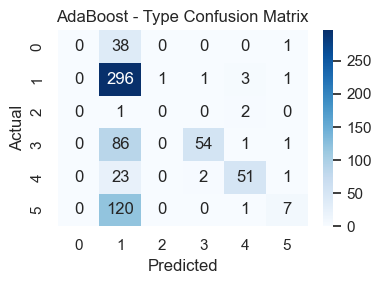

In [18]:
results = []

# Binary
results.append(evaluate_model(log_bin, X_test_count, y_test_binary, "Logistic Regression", "binary"))
results.append(evaluate_model(rf_bin, X_test_count, y_test_binary, "Random Forest", "binary"))
results.append(evaluate_model(ada_bin, X_test_count, y_test_binary, "AdaBoost", "binary"))

# Type
results.append(evaluate_model(log_type, X_test_type, y_test_type, "Logistic Regression", "type"))
results.append(evaluate_model(rf_type, X_test_type, y_test_type, "Random Forest", "type"))
results.append(evaluate_model(ada_type, X_test_type, y_test_type, "AdaBoost", "type"))


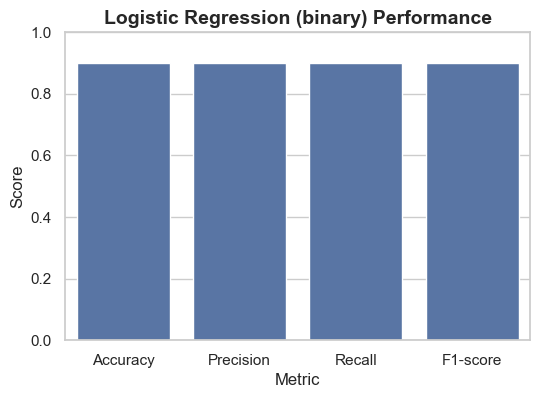

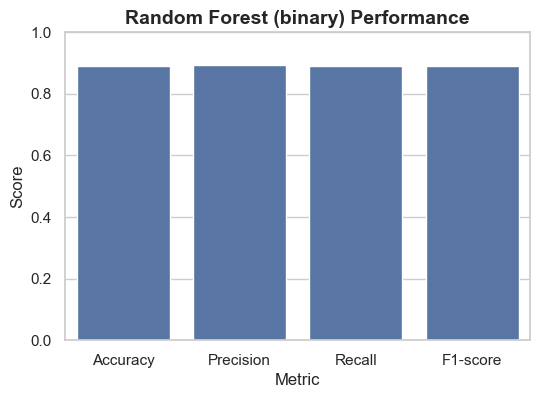

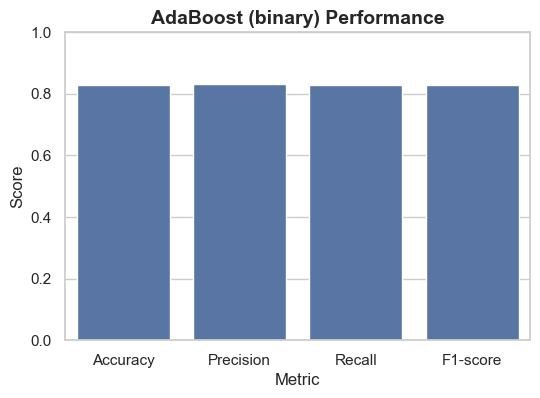

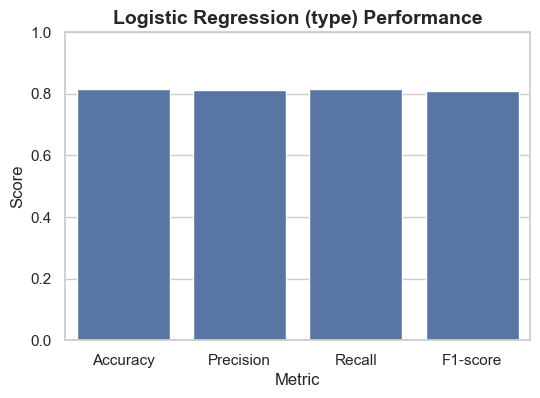

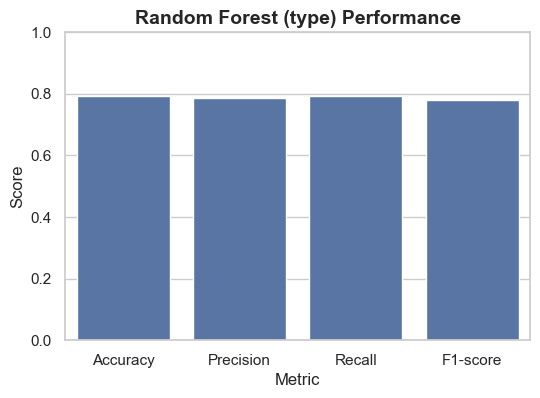

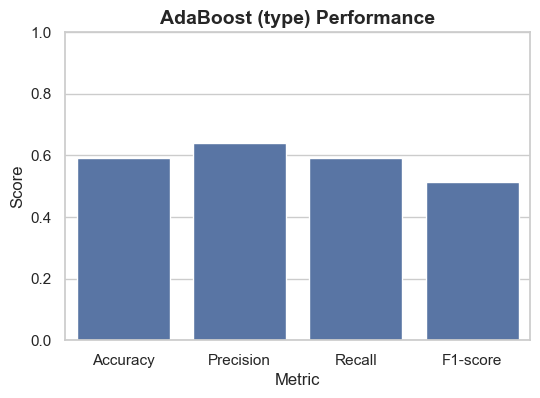

In [40]:
# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Separate plots for each model
for idx, row in results_df.iterrows():
    model_name = row['Model']
    task_type = row['Type']
    
    metrics = {
        "Accuracy": row['Accuracy'],
        "Precision": row['Precision'],
        "Recall": row['Recall'],
        "F1-score": row['F1-score']
    }
    
    # Plot metrics for this model
    plt.figure(figsize=(6,4))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
    plt.ylim(0, 1)
    plt.title(f"{model_name} ({task_type}) Performance", fontsize=14, weight='bold')
    plt.ylabel("Score", fontsize=12)
    plt.xlabel("Metric", fontsize=12)
    plt.show()


Cell 5: Comparative Table

In [19]:
df_results = pd.DataFrame(results)
print("✅ Comparative Summary:")
display(df_results)


✅ Comparative Summary:


,Model,Type,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,binary,0.898667,0.898722,0.898667,0.898688
1,Random Forest,binary,0.892000,0.892964,0.892000,0.891629
2,AdaBoost,binary,0.828000,0.830856,0.828000,0.828274
3,Logistic Regression,type,0.816208,0.812272,0.816208,0.810853
4,Random Forest,type,0.791606,0.786228,0.791606,0.778668
5,AdaBoost,type,0.590449,0.639919,0.590449,0.513145


Cell 6: Comparison Bar Plot

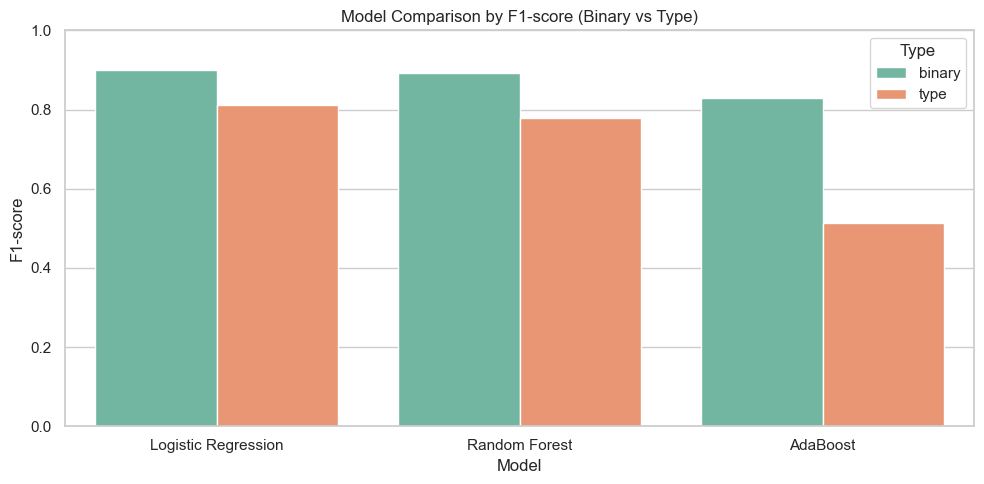

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_results, x='Model', y='F1-score', hue='Type', palette='Set2')
plt.title("Model Comparison by F1-score (Binary vs Type)")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Cell 7: Save Models as .pkl

In [21]:
# Save binary models
pickle.dump(log_bin, open("logistic_binary.pkl", "wb"))
pickle.dump(rf_bin, open("randomforest_binary.pkl", "wb"))
pickle.dump(ada_bin, open("adaboost_binary.pkl", "wb"))

# Save type models
pickle.dump(log_type, open("logistic_type.pkl", "wb"))
pickle.dump(rf_type, open("randomforest_type.pkl", "wb"))
pickle.dump(ada_type, open("adaboost_type.pkl", "wb"))

# Save vectorizer (needed for Flask)
pickle.dump(vectorizer, open("count_vectorizer.pkl", "wb"))


Deep models

In [22]:
!pip install tensorflow



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os


Cell 3: Prepare Text & Labels

In [24]:
texts = df['clean_text'].astype(str).tolist()

labels_binary = df['label_final'].values
labels_type = df[df['label_final'] == 1]['type_final'].values  # for type classification
texts_type = df[df['label_final'] == 1]['clean_text'].tolist()  # text subset


Cell 4: Tokenize & Pad Sequences

In [25]:
max_words = 10000
max_len = 100  # Max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# For type classification
sequences_type = tokenizer.texts_to_sequences(texts_type)
padded_type = pad_sequences(sequences_type, maxlen=max_len, padding='post')


In [26]:
import pickle

# Save the tokenizer for use in Flask
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("✅ Tokenizer saved as tokenizer.pkl")


✅ Tokenizer saved as tokenizer.pkl


 Cell 5: Load GloVe Embeddings (100d

In [27]:
embedding_index = {}
glove_path = "glove.6B.100d.txt"

with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

print("✅ GloVe Loaded:", len(embedding_index), "words")


✅ GloVe Loaded: 400000 words


Cell 6: Create Embedding Matrix

In [28]:
embedding_dim = 100
word_index = tokenizer.word_index

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


Cell 7: Prepare Labels

In [29]:
from sklearn.model_selection import train_test_split

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    padded, labels_binary, test_size=0.2, random_state=42)


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_type_encoded = le.fit_transform(labels_type)

X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(
    padded_type, y_type_encoded, test_size=0.2, random_state=42)

# Save label encoder for later Flask use
import pickle
pickle.dump(le, open("type_label_encoder.pkl", "wb"))
print(le.classes_)



['ethnicity' 'general' 'other' 'political' 'religious' 'sexual']


Cell 8: Define Deep Learning Models

 CNN Model - Binary and Multi-class Classification

Epoch 1/5
188/188 [==============================] - 5s 22ms/step - loss: 0.4360 - accuracy: 0.7857 - val_loss: 0.2837 - val_accuracy: 0.8893
Epoch 2/5
188/188 [==============================] - 4s 20ms/step - loss: 0.2490 - accuracy: 0.9021 - val_loss: 0.2380 - val_accuracy: 0.9093
Epoch 3/5
188/188 [==============================] - 4s 21ms/step - loss: 0.1887 - accuracy: 0.9311 - val_loss: 0.2322 - val_accuracy: 0.9087
Epoch 4/5
188/188 [==============================] - 4s 20ms/step - loss: 0.1363 - accuracy: 0.9536 - val_loss: 0.2340 - val_accuracy: 0.9093
Epoch 5/5
47/47 [==============================] - 0s 7ms/step

CNN Binary Classification Metrics:
Accuracy: 0.9160
Precision: 0.9040
Recall: 0.9145
F1-Score: 0.9092

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     743      67
Actual 1      59     631


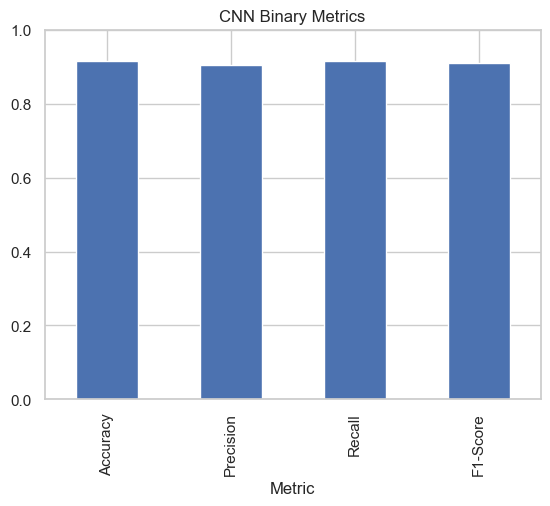

In [31]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define CNN model for binary classification
cnn_binary = Sequential([
    Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train CNN binary model
cnn_binary.fit(X_train_bin, y_train_bin, epochs=5, batch_size=32, validation_data=(X_test_bin, y_test_bin), verbose=1)

# Evaluate CNN binary
y_pred_bin = (cnn_binary.predict(X_test_bin) > 0.5).astype("int32")
cnn_binary_acc = accuracy_score(y_test_bin, y_pred_bin)
cnn_binary_prec = precision_score(y_test_bin, y_pred_bin)
cnn_binary_rec = recall_score(y_test_bin, y_pred_bin)
cnn_binary_f1 = f1_score(y_test_bin, y_pred_bin)
cnn_binary_cm = confusion_matrix(y_test_bin, y_pred_bin)

print("\nCNN Binary Classification Metrics:")
print(f"Accuracy: {cnn_binary_acc:.4f}")
print(f"Precision: {cnn_binary_prec:.4f}")
print(f"Recall: {cnn_binary_rec:.4f}")
print(f"F1-Score: {cnn_binary_f1:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(cnn_binary_cm, columns=['Pred 0', 'Pred 1'], index=['Actual 0', 'Actual 1']))

# Save binary model
cnn_binary.save("cnn_binary_model.h5")

# Plot binary metrics
binary_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [cnn_binary_acc, cnn_binary_prec, cnn_binary_rec, cnn_binary_f1]
})
binary_metrics.plot(x='Metric', y='Score', kind='bar', legend=False, title='CNN Binary Metrics', ylim=(0,1))
plt.grid(True)
plt.show()



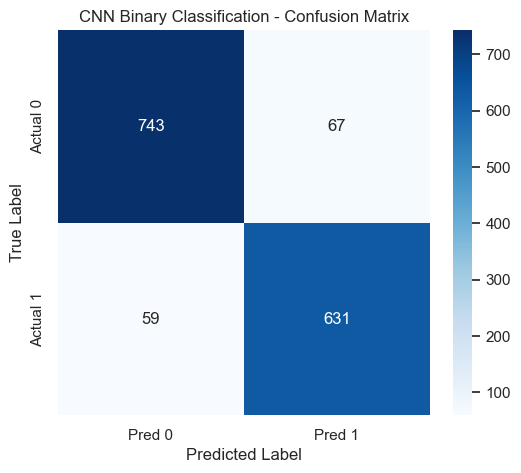

In [41]:
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cnn_binary_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("CNN Binary Classification - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


--- MULTI-CLASS (Type) CNN ---

Epoch 1/5
87/87 [==============================] - 3s 26ms/step - loss: 1.2454 - accuracy: 0.5243 - val_loss: 0.8638 - val_accuracy: 0.7149
Epoch 2/5
87/87 [==============================] - 2s 19ms/step - loss: 0.7731 - accuracy: 0.7335 - val_loss: 0.6325 - val_accuracy: 0.7656
Epoch 3/5
87/87 [==============================] - 2s 19ms/step - loss: 0.5690 - accuracy: 0.8114 - val_loss: 0.5807 - val_accuracy: 0.8017
Epoch 4/5
87/87 [==============================] - 2s 19ms/step - loss: 0.4506 - accuracy: 0.8555 - val_loss: 0.5686 - val_accuracy: 0.8104
Epoch 5/5
22/22 [==============================] - 0s 7ms/step

CNN Multi-class Classification Metrics:
Accuracy: 0.8148
Precision: 0.8041
Recall: 0.8148
F1-Score: 0.7995

Confusion Matrix:
   0    1  2    3   4   5
0  5   22  0    3   1   8
1  1  274  0    2   4  21
2  0    0  0    1   2   0
3  0   13  0  127   0   2
4  2    8  0    0  66   1
5  1   35  0    1   0  91


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


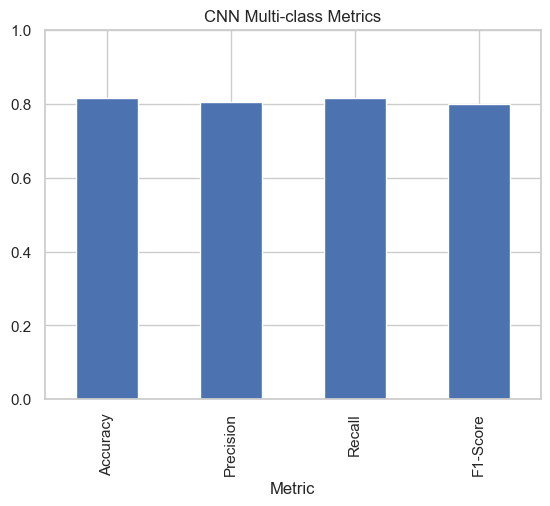

In [32]:

from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_type_enc = le.fit_transform(y_train_type)
y_test_type_enc = le.transform(y_test_type)

# Define CNN model for multi-class
cnn_multi = Sequential([
    Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])
cnn_multi.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train multi-class CNN model
cnn_multi.fit(X_train_type, y_train_type_enc, epochs=5, batch_size=32, validation_data=(X_test_type, y_test_type_enc), verbose=1)

# Evaluate multi-class
y_pred_type = np.argmax(cnn_multi.predict(X_test_type), axis=1)
cnn_multi_acc = accuracy_score(y_test_type_enc, y_pred_type)
cnn_multi_prec = precision_score(y_test_type_enc, y_pred_type, average='weighted')
cnn_multi_rec = recall_score(y_test_type_enc, y_pred_type, average='weighted')
cnn_multi_f1 = f1_score(y_test_type_enc, y_pred_type, average='weighted')
cnn_multi_cm = confusion_matrix(y_test_type_enc, y_pred_type)

print("\nCNN Multi-class Classification Metrics:")
print(f"Accuracy: {cnn_multi_acc:.4f}")
print(f"Precision: {cnn_multi_prec:.4f}")
print(f"Recall: {cnn_multi_rec:.4f}")
print(f"F1-Score: {cnn_multi_f1:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(cnn_multi_cm, columns=le.classes_, index=le.classes_))

# Save multi-class model
cnn_multi.save("cnn_type_model.h5")

# Plot multi-class metrics
multi_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [cnn_multi_acc, cnn_multi_prec, cnn_multi_rec, cnn_multi_f1]
})
multi_metrics.plot(x='Metric', y='Score', kind='bar', legend=False, title='CNN Multi-class Metrics', ylim=(0,1))
plt.grid(True)
plt.show()


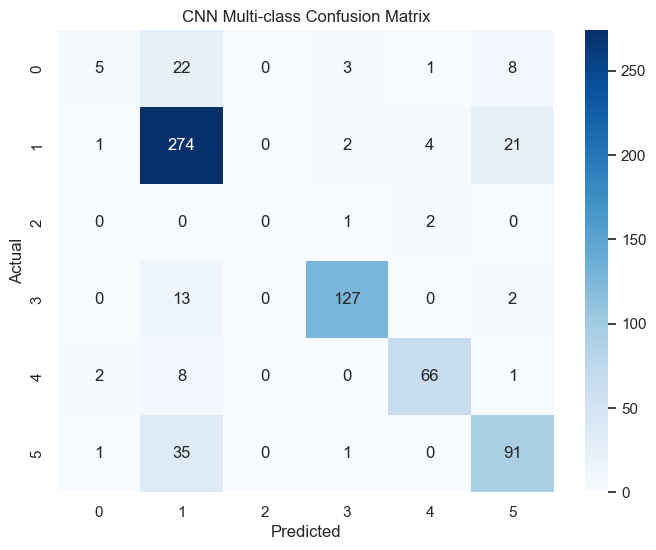

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cnn_multi_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Multi-class Confusion Matrix")
plt.show()


Cell 9: BiLSTM Model - Binary and Multi-class Classification

Epoch 1/5
188/188 [==============================] - 17s 68ms/step - loss: 0.4507 - accuracy: 0.7919 - val_loss: 0.3404 - val_accuracy: 0.8513
Epoch 2/5
188/188 [==============================] - 14s 73ms/step - loss: 0.3104 - accuracy: 0.8737 - val_loss: 0.2791 - val_accuracy: 0.8800
Epoch 3/5
188/188 [==============================] - 13s 67ms/step - loss: 0.2701 - accuracy: 0.8903 - val_loss: 0.2643 - val_accuracy: 0.8927
Epoch 4/5
188/188 [==============================] - 12s 66ms/step - loss: 0.2504 - accuracy: 0.8983 - val_loss: 0.2386 - val_accuracy: 0.9000
Epoch 5/5
47/47 [==============================] - 2s 23ms/step

BiLSTM Binary Classification Metrics:
Accuracy: 0.9033
Precision: 0.8833
Recall: 0.9101
F1-Score: 0.8965

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     727      83
Actual 1      62     628


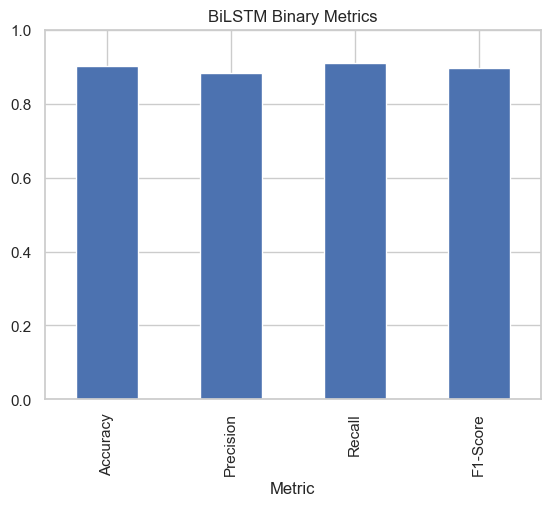

In [33]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM

# Define BiLSTM model for binary classification
bilstm_binary = Sequential([
    Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
bilstm_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train BiLSTM binary model
bilstm_binary.fit(X_train_bin, y_train_bin, epochs=5, batch_size=32, validation_data=(X_test_bin, y_test_bin), verbose=1)

# Evaluate BiLSTM binary
y_pred_bin = (bilstm_binary.predict(X_test_bin) > 0.5).astype("int32")
bilstm_binary_acc = accuracy_score(y_test_bin, y_pred_bin)
bilstm_binary_prec = precision_score(y_test_bin, y_pred_bin)
bilstm_binary_rec = recall_score(y_test_bin, y_pred_bin)
bilstm_binary_f1 = f1_score(y_test_bin, y_pred_bin)
bilstm_binary_cm = confusion_matrix(y_test_bin, y_pred_bin)

print("\nBiLSTM Binary Classification Metrics:")
print(f"Accuracy: {bilstm_binary_acc:.4f}")
print(f"Precision: {bilstm_binary_prec:.4f}")
print(f"Recall: {bilstm_binary_rec:.4f}")
print(f"F1-Score: {bilstm_binary_f1:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(bilstm_binary_cm, columns=['Pred 0', 'Pred 1'], index=['Actual 0', 'Actual 1']))

# Save binary model
bilstm_binary.save("bilstm_binary_model.h5")

# Plot binary metrics
binary_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [bilstm_binary_acc, bilstm_binary_prec, bilstm_binary_rec, bilstm_binary_f1]
})
binary_metrics.plot(x='Metric', y='Score', kind='bar', legend=False, title='BiLSTM Binary Metrics', ylim=(0,1))
plt.grid(True)
plt.show()



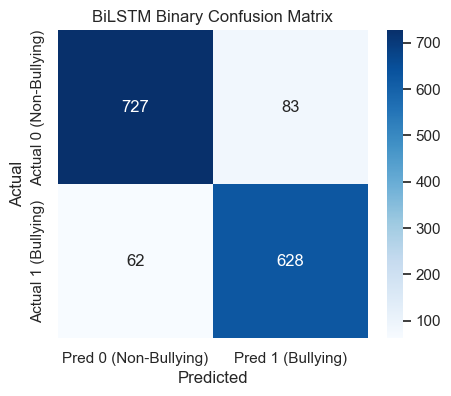

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(5,4))
sns.heatmap(bilstm_binary_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0 (Non-Bullying)', 'Pred 1 (Bullying)'],
            yticklabels=['Actual 0 (Non-Bullying)', 'Actual 1 (Bullying)'])
plt.title("BiLSTM Binary Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

--- MULTI-CLASS (Type) BiLSTM ---

Epoch 1/5
87/87 [==============================] - 11s 75ms/step - loss: 1.1901 - accuracy: 0.5333 - val_loss: 0.8394 - val_accuracy: 0.7192
Epoch 2/5
87/87 [==============================] - 6s 63ms/step - loss: 0.7556 - accuracy: 0.7266 - val_loss: 0.7002 - val_accuracy: 0.7525
Epoch 3/5
87/87 [==============================] - 5s 63ms/step - loss: 0.6533 - accuracy: 0.7650 - val_loss: 0.6654 - val_accuracy: 0.7656
Epoch 4/5
87/87 [==============================] - 5s 62ms/step - loss: 0.5954 - accuracy: 0.7976 - val_loss: 0.6666 - val_accuracy: 0.7511
Epoch 5/5
22/22 [==============================] - 1s 25ms/step

BiLSTM Multi-class Classification Metrics:
Accuracy: 0.7902
Precision: 0.7460
Recall: 0.7902
F1-Score: 0.7659

Confusion Matrix:
   0    1  2    3   4   5
0  0   24  0    4   3   8
1  0  266  0    3   5  28
2  0    0  0    0   3   0
3  0   13  0  128   0   1
4  0    9  0    0  67   1
5  1   40  0    2   0  85


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


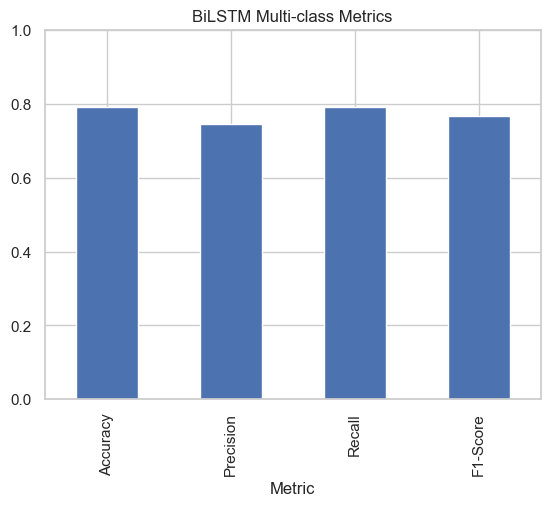

In [34]:

# Define BiLSTM model for multi-class
bilstm_multi = Sequential([
    Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
bilstm_multi.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train multi-class BiLSTM model
bilstm_multi.fit(X_train_type, y_train_type_enc, epochs=5, batch_size=32, validation_data=(X_test_type, y_test_type_enc), verbose=1)

# Evaluate multi-class
y_pred_type = np.argmax(bilstm_multi.predict(X_test_type), axis=1)
bilstm_multi_acc = accuracy_score(y_test_type_enc, y_pred_type)
bilstm_multi_prec = precision_score(y_test_type_enc, y_pred_type, average='weighted')
bilstm_multi_rec = recall_score(y_test_type_enc, y_pred_type, average='weighted')
bilstm_multi_f1 = f1_score(y_test_type_enc, y_pred_type, average='weighted')
bilstm_multi_cm = confusion_matrix(y_test_type_enc, y_pred_type)

print("\nBiLSTM Multi-class Classification Metrics:")
print(f"Accuracy: {bilstm_multi_acc:.4f}")
print(f"Precision: {bilstm_multi_prec:.4f}")
print(f"Recall: {bilstm_multi_rec:.4f}")
print(f"F1-Score: {bilstm_multi_f1:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(bilstm_multi_cm, columns=le.classes_, index=le.classes_))

# Save multi-class model
bilstm_multi.save("bilstm_type_model.h5")

# Plot multi-class metrics
multi_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [bilstm_multi_acc, bilstm_multi_prec, bilstm_multi_rec, bilstm_multi_f1]
})
multi_metrics.plot(x='Metric', y='Score', kind='bar', legend=False, title='BiLSTM Multi-class Metrics', ylim=(0,1))
plt.grid(True)
plt.show()


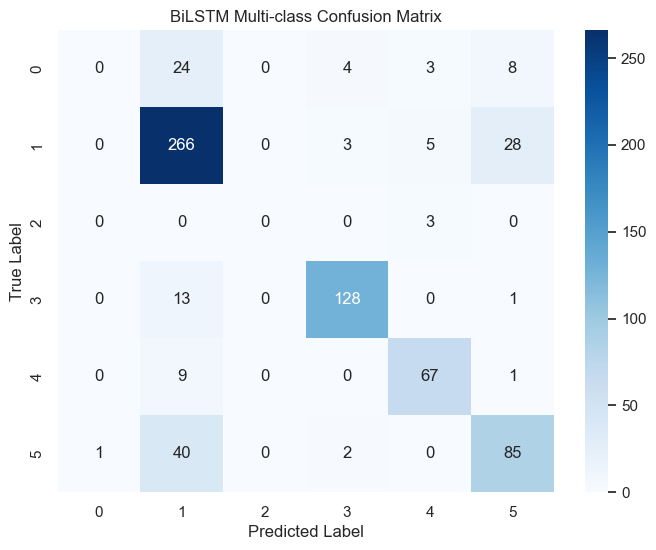

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(bilstm_multi_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("BiLSTM Multi-class Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Cell 10: GRU Model - Binary and Multi-class Classification

Epoch 1/5
188/188 [==============================] - 12s 47ms/step - loss: 0.6908 - accuracy: 0.5390 - val_loss: 0.6900 - val_accuracy: 0.5400
Epoch 2/5
188/188 [==============================] - 8s 45ms/step - loss: 0.6908 - accuracy: 0.5392 - val_loss: 0.6901 - val_accuracy: 0.5400
Epoch 3/5
188/188 [==============================] - 9s 46ms/step - loss: 0.6907 - accuracy: 0.5392 - val_loss: 0.6900 - val_accuracy: 0.5400
Epoch 4/5
188/188 [==============================] - 9s 48ms/step - loss: 0.6903 - accuracy: 0.5392 - val_loss: 0.6900 - val_accuracy: 0.5400
Epoch 5/5
47/47 [==============================] - 1s 14ms/step

GRU Binary Classification Metrics:
Accuracy: 0.5400
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     810       0
Actual 1     690       0


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


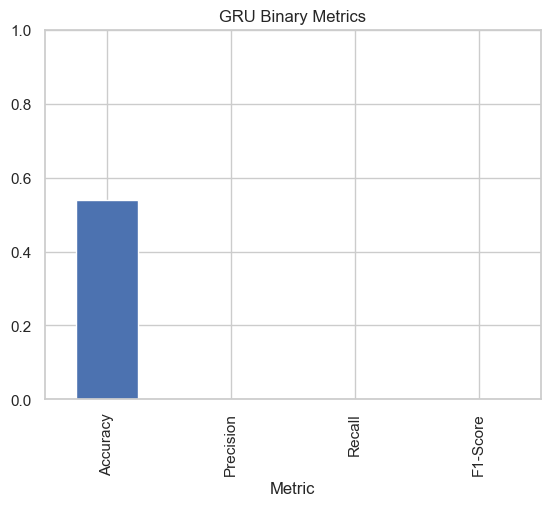

In [35]:

from tensorflow.keras.layers import GRU

# Define GRU model for binary classification
gru_binary = Sequential([
    Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False),
    GRU(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
gru_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train GRU binary model
gru_binary.fit(X_train_bin, y_train_bin, epochs=5, batch_size=32, validation_data=(X_test_bin, y_test_bin), verbose=1)

# Evaluate GRU binary
y_pred_bin = (gru_binary.predict(X_test_bin) > 0.5).astype("int32")
gru_binary_acc = accuracy_score(y_test_bin, y_pred_bin)
gru_binary_prec = precision_score(y_test_bin, y_pred_bin)
gru_binary_rec = recall_score(y_test_bin, y_pred_bin)
gru_binary_f1 = f1_score(y_test_bin, y_pred_bin)
gru_binary_cm = confusion_matrix(y_test_bin, y_pred_bin)

print("\nGRU Binary Classification Metrics:")
print(f"Accuracy: {gru_binary_acc:.4f}")
print(f"Precision: {gru_binary_prec:.4f}")
print(f"Recall: {gru_binary_rec:.4f}")
print(f"F1-Score: {gru_binary_f1:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(gru_binary_cm, columns=['Pred 0', 'Pred 1'], index=['Actual 0', 'Actual 1']))

# Save binary model
gru_binary.save("gru_binary_model.h5")

# Plot binary metrics
binary_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [gru_binary_acc, gru_binary_prec, gru_binary_rec, gru_binary_f1]
})
binary_metrics.plot(x='Metric', y='Score', kind='bar', legend=False, title='GRU Binary Metrics', ylim=(0,1))
plt.grid(True)
plt.show()



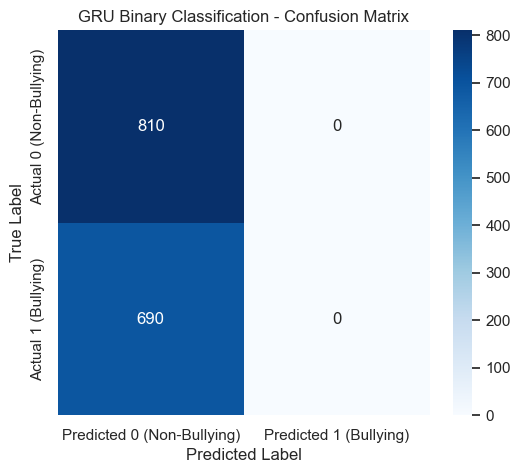

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(gru_binary_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (Non-Bullying)', 'Predicted 1 (Bullying)'],
            yticklabels=['Actual 0 (Non-Bullying)', 'Actual 1 (Bullying)'])
plt.title("GRU Binary Classification - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


 --- MULTI-CLASS (Type) GRU ---

Epoch 1/5
87/87 [==============================] - 8s 51ms/step - loss: 1.5719 - accuracy: 0.3961 - val_loss: 1.4563 - val_accuracy: 0.4370
Epoch 2/5
87/87 [==============================] - 4s 44ms/step - loss: 1.4774 - accuracy: 0.3993 - val_loss: 1.4553 - val_accuracy: 0.4370
Epoch 3/5
87/87 [==============================] - 4s 45ms/step - loss: 1.4719 - accuracy: 0.4001 - val_loss: 1.4505 - val_accuracy: 0.4370
Epoch 4/5
87/87 [==============================] - 4s 51ms/step - loss: 1.4688 - accuracy: 0.4001 - val_loss: 1.4386 - val_accuracy: 0.4370
Epoch 5/5
22/22 [==============================] - 1s 13ms/step

GRU Multi-class Classification Metrics:
Accuracy: 0.4370
Precision: 0.1910
Recall: 0.4370
F1-Score: 0.2658

Confusion Matrix:
   0    1  2  3  4  5
0  0   39  0  0  0  0
1  0  302  0  0  0  0
2  0    3  0  0  0  0
3  0  142  0  0  0  0
4  0   77  0  0  0  0
5  0  128  0  0  0  0


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


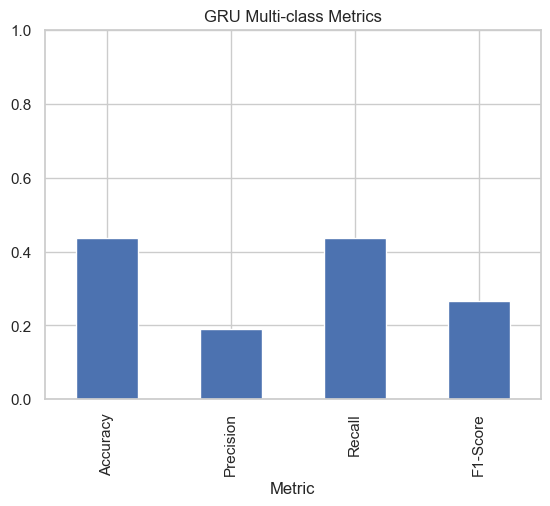

In [36]:

# Define GRU model for multi-class
gru_multi = Sequential([
    Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False),
    GRU(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
gru_multi.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train multi-class GRU model
gru_multi.fit(X_train_type, y_train_type_enc, epochs=5, batch_size=32, validation_data=(X_test_type, y_test_type_enc), verbose=1)

# Evaluate multi-class
y_pred_type = np.argmax(gru_multi.predict(X_test_type), axis=1)
gru_multi_acc = accuracy_score(y_test_type_enc, y_pred_type)
gru_multi_prec = precision_score(y_test_type_enc, y_pred_type, average='weighted')
gru_multi_rec = recall_score(y_test_type_enc, y_pred_type, average='weighted')
gru_multi_f1 = f1_score(y_test_type_enc, y_pred_type, average='weighted')
gru_multi_cm = confusion_matrix(y_test_type_enc, y_pred_type)

print("\nGRU Multi-class Classification Metrics:")
print(f"Accuracy: {gru_multi_acc:.4f}")
print(f"Precision: {gru_multi_prec:.4f}")
print(f"Recall: {gru_multi_rec:.4f}")
print(f"F1-Score: {gru_multi_f1:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(gru_multi_cm, columns=le.classes_, index=le.classes_))

# Save multi-class model
gru_multi.save("gru_type_model.h5")

# Plot multi-class metrics
multi_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [gru_multi_acc, gru_multi_prec, gru_multi_rec, gru_multi_f1]
})
multi_metrics.plot(x='Metric', y='Score', kind='bar', legend=False, title='GRU Multi-class Metrics', ylim=(0,1))
plt.grid(True)
plt.show()


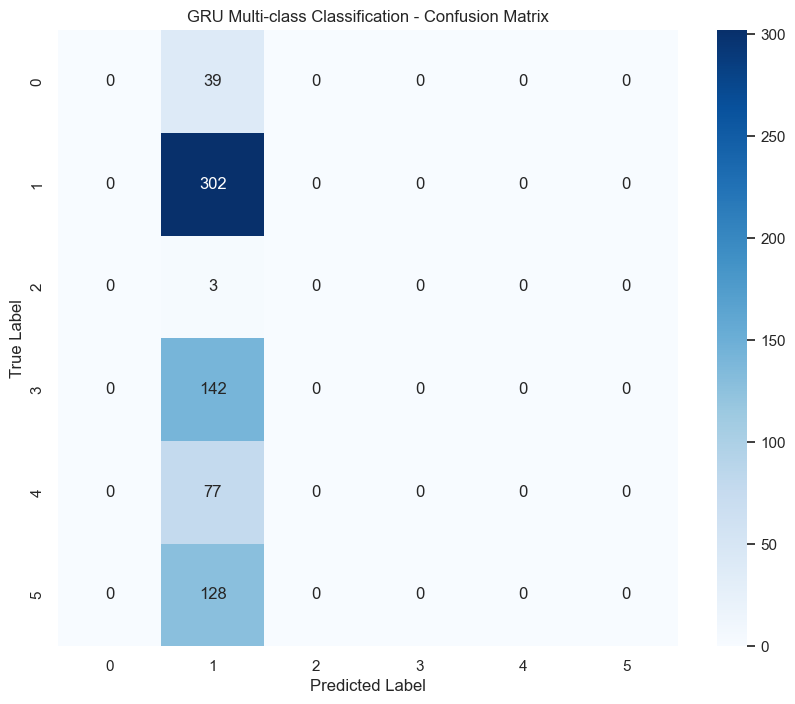

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix Heatmap for Multi-class GRU
plt.figure(figsize=(10,8))
sns.heatmap(gru_multi_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("GRU Multi-class Classification - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Cell 11: Stacked Model - Binary and Multi-class Classification

Epoch 1/5
188/188 [==============================] - 23s 91ms/step - loss: 0.3671 - accuracy: 0.8354 - val_loss: 0.2686 - val_accuracy: 0.8947
Epoch 2/5
188/188 [==============================] - 18s 99ms/step - loss: 0.2180 - accuracy: 0.9168 - val_loss: 0.2364 - val_accuracy: 0.9053
Epoch 3/5
188/188 [==============================] - 18s 98ms/step - loss: 0.1467 - accuracy: 0.9453 - val_loss: 0.2312 - val_accuracy: 0.9080
Epoch 4/5
188/188 [==============================] - 18s 98ms/step - loss: 0.1114 - accuracy: 0.9600 - val_loss: 0.2381 - val_accuracy: 0.9147
Epoch 5/5
47/47 [==============================] - 3s 31ms/step

Stacked Binary Classification Metrics:
Accuracy: 0.9147
Precision: 0.9120
Recall: 0.9014
F1-Score: 0.9067

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     750      60
Actual 1      68     622


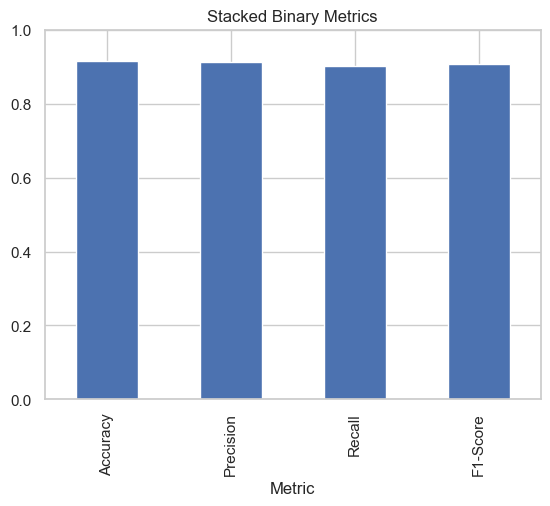

In [37]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate

# Define Stacked Ensemble model for binary classification
input_layer = Input(shape=(100,))
embedded = Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False)(input_layer)

cnn = Conv1D(64, 5, activation='relu')(embedded)
cnn = GlobalMaxPooling1D()(cnn)

lstm = Bidirectional(LSTM(64))(embedded)

gru = GRU(64)(embedded)

merged = concatenate([cnn, lstm, gru])
dense = Dense(64, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(dense)

stacked_binary = Model(inputs=input_layer, outputs=output)
stacked_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train stacked binary model
stacked_binary.fit(X_train_bin, y_train_bin, epochs=5, batch_size=32, validation_data=(X_test_bin, y_test_bin), verbose=1)

# Evaluate binary stacked
y_pred_bin = (stacked_binary.predict(X_test_bin) > 0.5).astype("int32")
stacked_binary_acc = accuracy_score(y_test_bin, y_pred_bin)
stacked_binary_prec = precision_score(y_test_bin, y_pred_bin)
stacked_binary_rec = recall_score(y_test_bin, y_pred_bin)
stacked_binary_f1 = f1_score(y_test_bin, y_pred_bin)
stacked_binary_cm = confusion_matrix(y_test_bin, y_pred_bin)

print("\nStacked Binary Classification Metrics:")
print(f"Accuracy: {stacked_binary_acc:.4f}")
print(f"Precision: {stacked_binary_prec:.4f}")
print(f"Recall: {stacked_binary_rec:.4f}")
print(f"F1-Score: {stacked_binary_f1:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(stacked_binary_cm, columns=['Pred 0', 'Pred 1'], index=['Actual 0', 'Actual 1']))

# Save binary stacked model
stacked_binary.save("stacked_binary_model.h5")

# Plot binary stacked metrics
binary_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [stacked_binary_acc, stacked_binary_prec, stacked_binary_rec, stacked_binary_f1]
})
binary_metrics.plot(x='Metric', y='Score', kind='bar', legend=False, title='Stacked Binary Metrics', ylim=(0,1))
plt.grid(True)
plt.show()




--- MULTI-CLASS (Type) STACKED MODEL ---

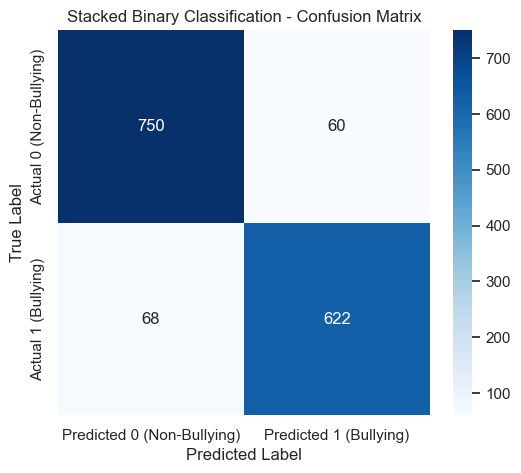

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix Heatmap for Stacked Binary Model
plt.figure(figsize=(6,5))
sns.heatmap(stacked_binary_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (Non-Bullying)', 'Predicted 1 (Bullying)'],
            yticklabels=['Actual 0 (Non-Bullying)', 'Actual 1 (Bullying)'])
plt.title("Stacked Binary Classification - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Epoch 1/5
87/87 [==============================] - 17s 123ms/step - loss: 0.9825 - accuracy: 0.6314 - val_loss: 0.7288 - val_accuracy: 0.7453
Epoch 2/5
87/87 [==============================] - 8s 87ms/step - loss: 0.5598 - accuracy: 0.8117 - val_loss: 0.5620 - val_accuracy: 0.8046
Epoch 3/5
87/87 [==============================] - 7s 80ms/step - loss: 0.4121 - accuracy: 0.8610 - val_loss: 0.5316 - val_accuracy: 0.8263
Epoch 4/5
87/87 [==============================] - 7s 81ms/step - loss: 0.3030 - accuracy: 0.9019 - val_loss: 0.5084 - val_accuracy: 0.8278
Epoch 5/5
22/22 [==============================] - 2s 24ms/step

Stacked Multi-class Classification Metrics:
Accuracy: 0.8234
Precision: 0.8225
Recall: 0.8234
F1-Score: 0.8226

Confusion Matrix:
    0    1  2    3   4   5
0  20   11  0    2   1   5
1   7  260  0    4   3  28
2   0    0  0    1   2   0
3   7    3  0  131   0   1
4   5    6  0    2  63   1
5   3   28  0    2   0  95


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


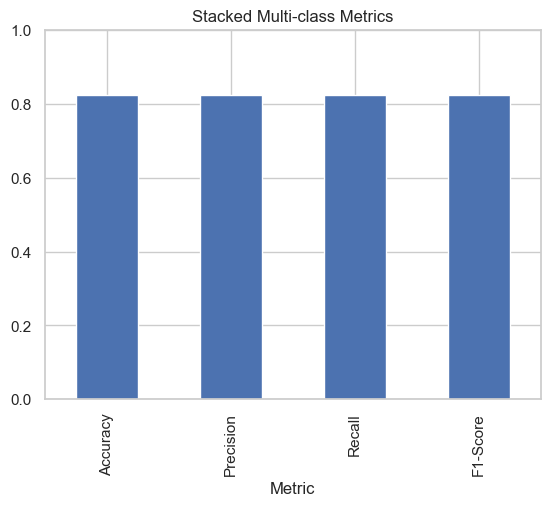

In [38]:

embedded = Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False)(input_layer)
cnn = Conv1D(64, 5, activation='relu')(embedded)
cnn = GlobalMaxPooling1D()(cnn)
lstm = Bidirectional(LSTM(64))(embedded)
gru = GRU(64)(embedded)
merged = concatenate([cnn, lstm, gru])
dense = Dense(64, activation='relu')(merged)
output = Dense(len(le.classes_), activation='softmax')(dense)

stacked_multi = Model(inputs=input_layer, outputs=output)
stacked_multi.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train multi-class stacked model
stacked_multi.fit(X_train_type, y_train_type_enc, epochs=5, batch_size=32, validation_data=(X_test_type, y_test_type_enc), verbose=1)

# Evaluate stacked multi-class
y_pred_type = np.argmax(stacked_multi.predict(X_test_type), axis=1)
stacked_multi_acc = accuracy_score(y_test_type_enc, y_pred_type)
stacked_multi_prec = precision_score(y_test_type_enc, y_pred_type, average='weighted')
stacked_multi_rec = recall_score(y_test_type_enc, y_pred_type, average='weighted')
stacked_multi_f1 = f1_score(y_test_type_enc, y_pred_type, average='weighted')
stacked_multi_cm = confusion_matrix(y_test_type_enc, y_pred_type)

print("\nStacked Multi-class Classification Metrics:")
print(f"Accuracy: {stacked_multi_acc:.4f}")
print(f"Precision: {stacked_multi_prec:.4f}")
print(f"Recall: {stacked_multi_rec:.4f}")
print(f"F1-Score: {stacked_multi_f1:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(stacked_multi_cm, columns=le.classes_, index=le.classes_))

# Save stacked multi-class model
stacked_multi.save("stacked_type_model.h5")

# Plot stacked multi-class metrics
multi_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [stacked_multi_acc, stacked_multi_prec, stacked_multi_rec, stacked_multi_f1]
})
multi_metrics.plot(x='Metric', y='Score', kind='bar', legend=False, title='Stacked Multi-class Metrics', ylim=(0,1))
plt.grid(True)
plt.show()

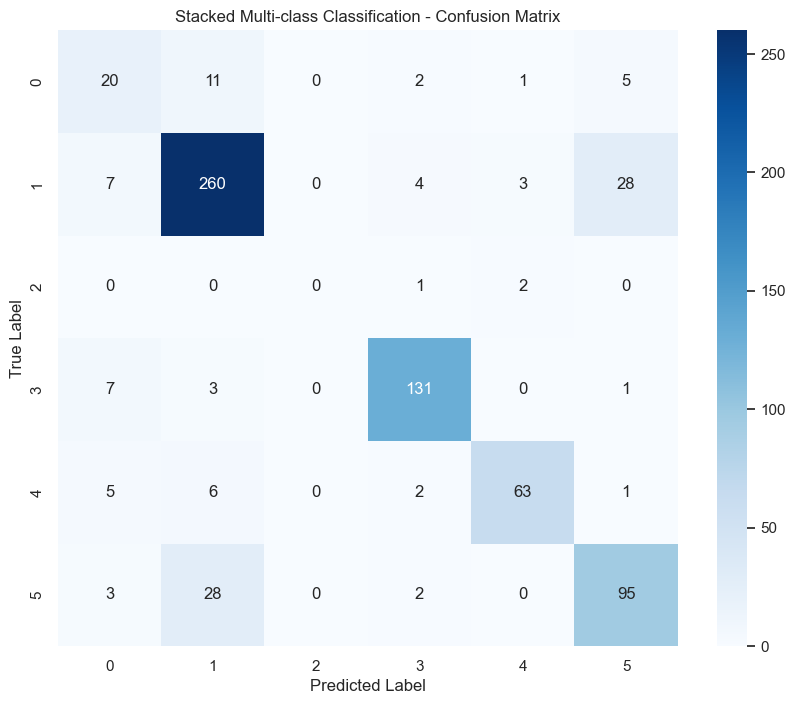

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix Heatmap for Stacked Multi-class Model
plt.figure(figsize=(10,8))
sns.heatmap(stacked_multi_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Stacked Multi-class Classification - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


 Cell 12: Final Comparison Table and Plot for All DL Models


Binary Classification Results:
     Model  Accuracy  Precision  Recall  F1-Score
0      CNN    0.9160     0.9040  0.9145    0.9092
1   BiLSTM    0.9033     0.8833  0.9101    0.8965
2      GRU    0.5400     0.0000  0.0000    0.0000
3  Stacked    0.9147     0.9120  0.9014    0.9067

Multi-class Classification Results:
     Model  Accuracy  Precision  Recall  F1-Score
0      CNN    0.8148     0.8041  0.8148    0.7995
1   BiLSTM    0.7902     0.7460  0.7902    0.7659
2      GRU    0.4370     0.1910  0.4370    0.2658
3  Stacked    0.8234     0.8225  0.8234    0.8226


C:\Users\HP\AppData\Local\Temp\ipykernel_7704\3320548447.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted, x='Model', y='Score', hue='Task', ci=None)


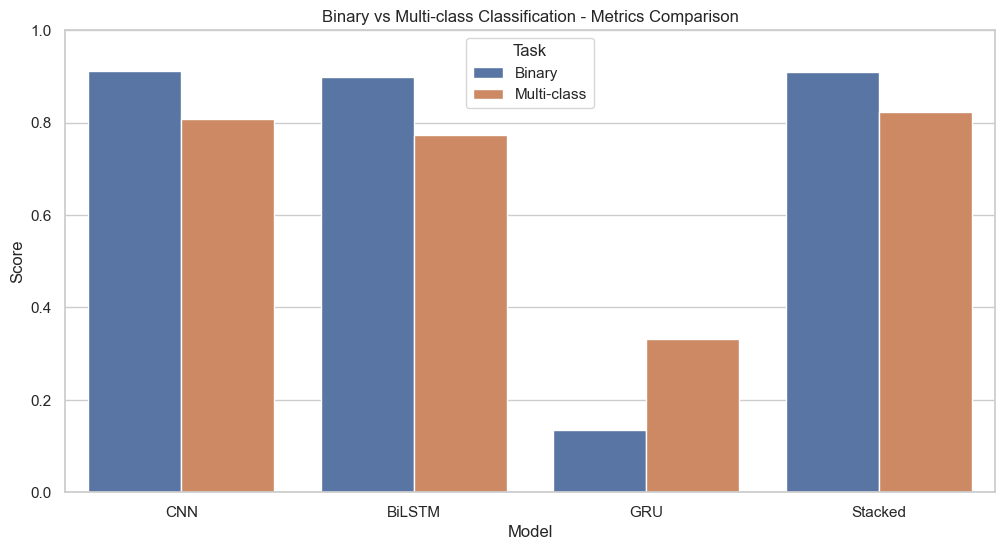

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Collect results (same as your code)
binary_results = pd.DataFrame({
    'Model': ['CNN', 'BiLSTM', 'GRU', 'Stacked'],
    'Accuracy': [cnn_binary_acc, bilstm_binary_acc, gru_binary_acc, stacked_binary_acc],
    'Precision': [cnn_binary_prec, bilstm_binary_prec, gru_binary_prec, stacked_binary_prec],
    'Recall': [cnn_binary_rec, bilstm_binary_rec, gru_binary_rec, stacked_binary_rec],
    'F1-Score': [cnn_binary_f1, bilstm_binary_f1, gru_binary_f1, stacked_binary_f1]
})

multi_results = pd.DataFrame({
    'Model': ['CNN', 'BiLSTM', 'GRU', 'Stacked'],
    'Accuracy': [cnn_multi_acc, bilstm_multi_acc, gru_multi_acc, stacked_multi_acc],
    'Precision': [cnn_multi_prec, bilstm_multi_prec, gru_multi_prec, stacked_multi_prec],
    'Recall': [cnn_multi_rec, bilstm_multi_rec, gru_multi_rec, stacked_multi_rec],
    'F1-Score': [cnn_multi_f1, bilstm_multi_f1, gru_multi_f1, stacked_multi_f1]
})

# Print result tables (same as your original code)
print("\nBinary Classification Results:")
print(binary_results.round(4))
print("\nMulti-class Classification Results:")
print(multi_results.round(4))

# ✅ Combined plot for Binary vs Multi
binary_results['Task'] = 'Binary'
multi_results['Task'] = 'Multi-class'
all_results = pd.concat([binary_results, multi_results])

melted = all_results.melt(id_vars=['Model','Task'], 
                          value_vars=['Accuracy','Precision','Recall','F1-Score'],
                          var_name='Metric', value_name='Score')

plt.figure(figsize=(12,6))
sns.barplot(data=melted, x='Model', y='Score', hue='Task', ci=None)
plt.ylim(0,1)
plt.title("Binary vs Multi-class Classification - Metrics Comparison")
plt.grid(True, axis='y')
plt.legend(title='Task')
plt.show()
